Import necessary libraries

In [ ]:
# Paper Title: "Enhancing Intrusion Detection in Cybersecurity using XGBoost: A Performance Analysis on the NSL-KDD Dataset"

# Practical Implementation from Start (Using XGBoost for High Accuracy)

# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

Upload Datasets

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KDDTest+.txt to KDDTest+ (1).txt
Saving KDDTrain+.txt to KDDTrain+ (1).txt


Load the Dataset

In [ ]:
train_data = pd.read_csv('KDDTrain+.txt', header=None)
test_data = pd.read_csv('KDDTest+.txt', header=None)

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

Train shape: (125973, 43)
Test shape: (22544, 43)


# Step 4: Assign column names and handle extra column if present

In [ ]:
# Define column names
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
    'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
    'target', 'extra'  # added 'extra' for unknown column if it exists
]

# Check if shape matches and adjust column list if needed
if train_data.shape[1] == 43:
    train_data.columns = columns
else:
    print("Train data has", train_data.shape[1], "columns. Adjusting column names accordingly.")

if test_data.shape[1] == 43:
    test_data.columns = columns
else:
    print("Test data has", test_data.shape[1], "columns. Adjusting column names accordingly.")

# Optional: drop extra column if unnecessary
if 'extra' in train_data.columns:
    train_data.drop('extra', axis=1, inplace=True)
    test_data.drop('extra', axis=1, inplace=True)


Encode Categorical Columns.

In [ ]:
# Step 4: Binary Classification (Normal vs Attack)
train_data['target'] = train_data['target'].apply(lambda x: 0 if x == 'normal' else 1)
test_data['target'] = test_data['target'].apply(lambda x: 0 if x == 'normal' else 1)


Step 6: Convert target labels to binary (0 = normal, 1 = attack)

In [ ]:
# Step 5: Encode Categorical Columns
cat_cols = ['protocol_type', 'service', 'flag']
encoders = {}
for col in cat_cols:
    enc = LabelEncoder()
    train_data[col] = enc.fit_transform(train_data[col])
    test_data[col] = enc.transform(test_data[col])
    encoders[col] = enc

 Step 7: Prepare Features and Labels for Training complete.

In [ ]:
# Step 6: Split Features and Labels
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']
X_test = test_data.drop('target', axis=1)
y_test = test_data['target']

# Step 8: Scale features using StandardScaler

In [ ]:
# Step 8: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)


# Step 9: Train ensemble model

In [ ]:
# Step 8: Train XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

# Step 10: Evaluate Model Performance

In [ ]:
# Step 9: Evaluation
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, train_preds))
print("Test Accuracy:", accuracy_score(y_test, test_preds))
print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_preds))


Training Accuracy: 0.9999047414922245
Test Accuracy: 0.8008782824698367

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.69      0.97      0.81      9711
           1       0.97      0.67      0.79     12833

    accuracy                           0.80     22544
   macro avg       0.83      0.82      0.80     22544
weighted avg       0.85      0.80      0.80     22544



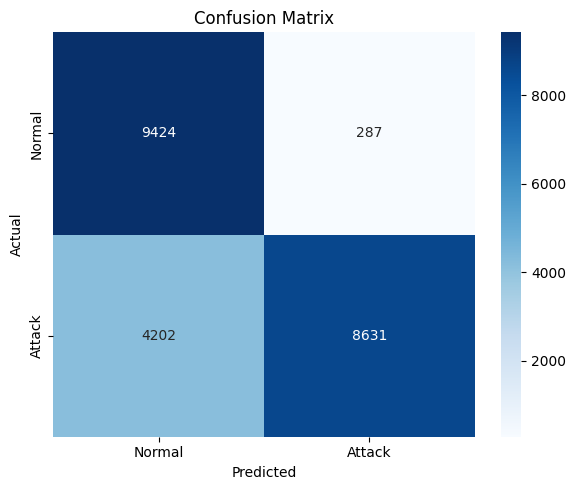

In [ ]:
# Step 10: Plot Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

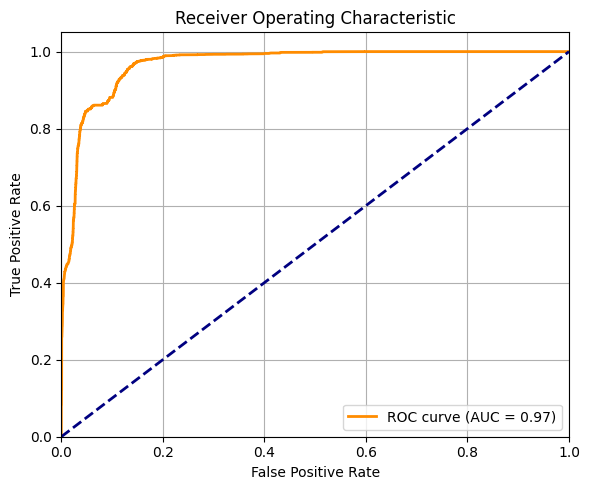

In [ ]:
# Step 11: ROC Curve and AUC Score
from sklearn.metrics import roc_curve, auc

# For binary classification
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
import joblib

joblib.dump(model, "xgboost_nslkdd_model.pkl")
print("Model saved as xgboost_nslkdd_model.pkl")

Model saved as xgboost_nslkdd_model.pkl


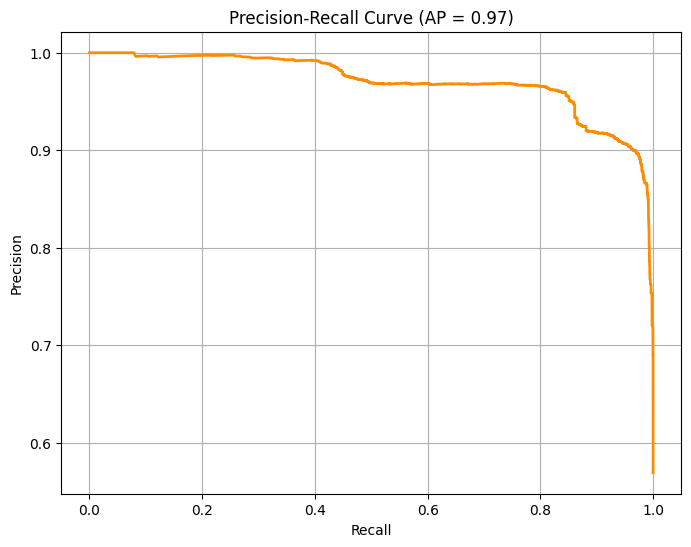

In [ ]:
# Step 13: Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

probs = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)
avg_precision = average_precision_score(y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP = {avg_precision:.2f})')
plt.grid()
plt.show()

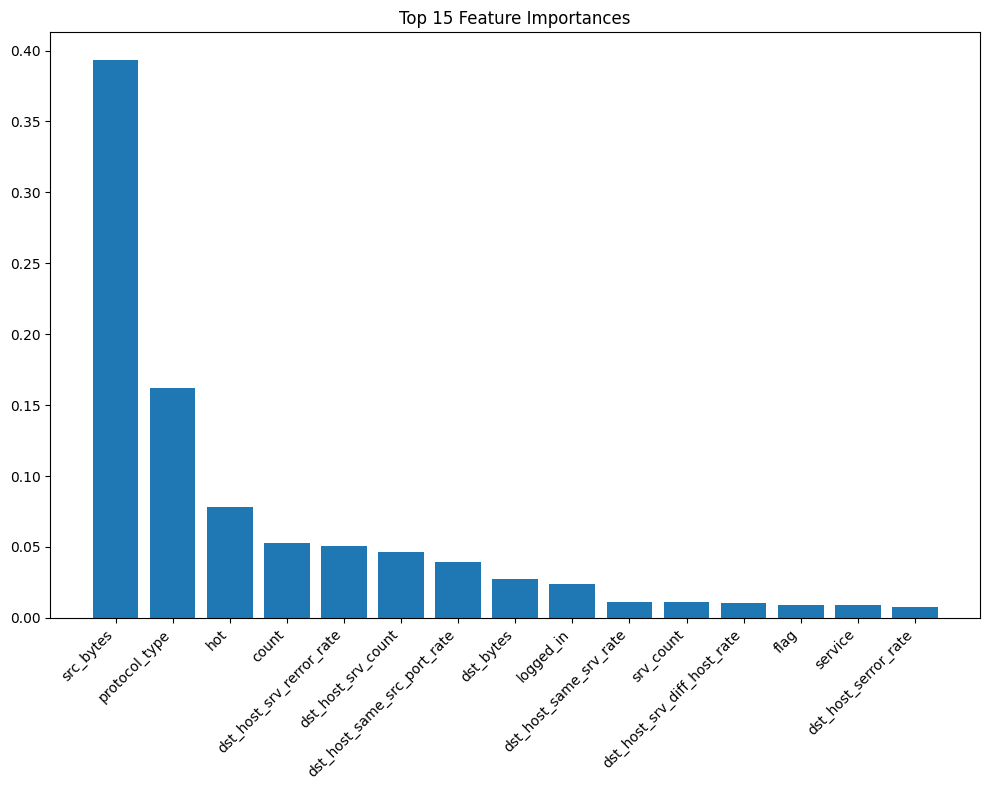

In [ ]:
# Step 14: Feature Importance Plot
importances = model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Top 15 Feature Importances")
plt.bar(range(15), importances[indices][:15], align="center")
plt.xticks(range(15), [feature_names[i] for i in indices][:15], rotation=45, ha='right')
plt.tight_layout()
plt.show()

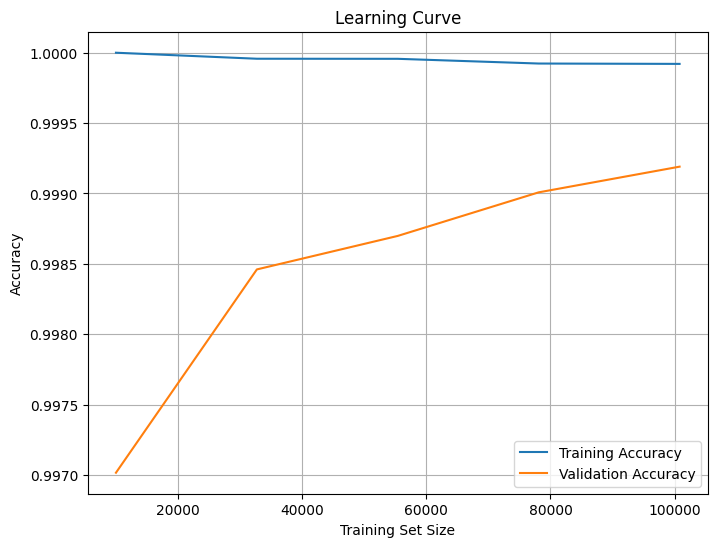

In [ ]:
# Step 15: Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()


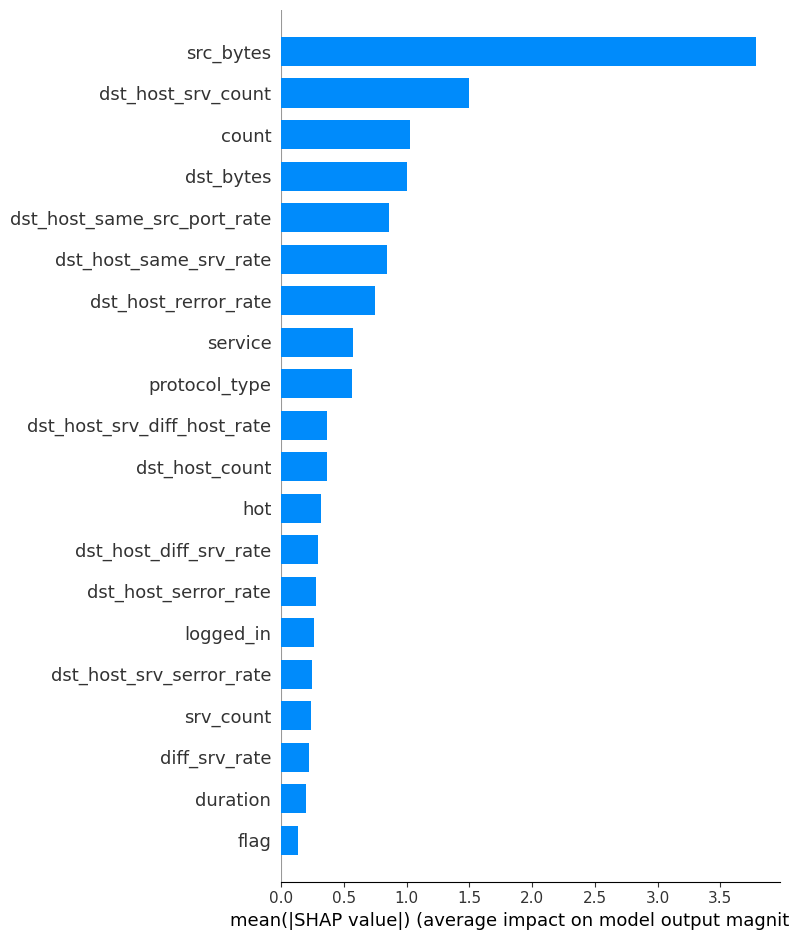

In [ ]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np
# 3. SHAP Summary Plot (Bar)
# If not installed: !pip install shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test[:100])
shap.summary_plot(shap_values, X_test[:100], plot_type="bar")
